In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('weather.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [3]:
df['Play'].value_counts()

Yes    9
No     5
Name: Play, dtype: int64

In [14]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play'], dtype='object')

In [4]:
Xf = list(df.columns)
Xf.remove('Play')
Xf

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [5]:
Endf = pd.get_dummies(df[Xf], drop_first=True)

In [6]:
list(Endf)

['Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_Normal',
 'Wind_Weak']

In [7]:
X=Endf
Y=df['Play'].map(lambda x: int(x =='Yes'))

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

In [9]:
model.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

In [10]:
predy = model.predict(X)

In [11]:
from sklearn import metrics
print(metrics.roc_auc_score(Y,predy))
print(metrics.accuracy_score(Y,predy))

1.0
1.0


In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

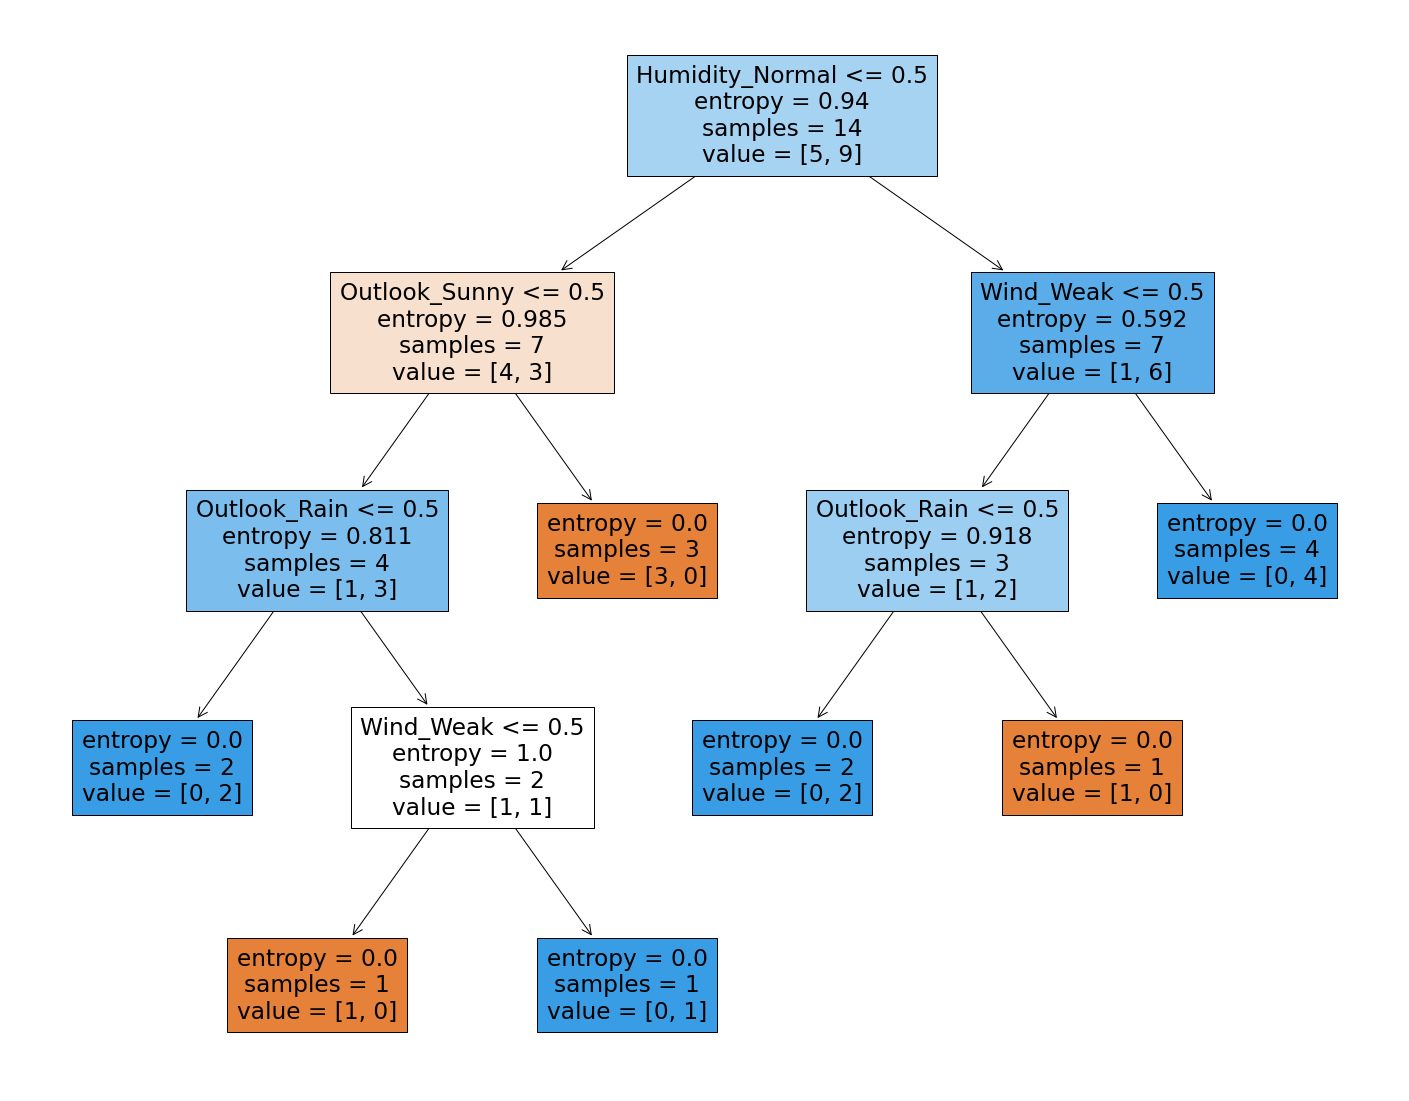

In [13]:
fig=plt.figure(figsize=(25,20))
a = tree.plot_tree(model,feature_names=X.columns,filled=True)